<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ML.jpg" alt="Drawing" style="width:1000px;">



# <center> **07. Machine learning: a Regression introduction!** </center>

## **Outline**

[1. **Understanding ML Regression**](#eje1)

[2. **Plus Data and plus Regressors**](#eje2)

[3. **Learning curves: Tunning parameters**](#eje3)


In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

In [7]:
#@title 2. **LOAD LIB** { display-mode: "form" }
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

# **1. Understanding ML Regression** <a name="eje1"></a>


   - The regression is the problem of predicting a continuous quantity output for an example
   - Here we neet to estimate $\hat{y}$ and not $P(y|x)$

Now, we can try to imagine how many public bikes are demanded according to environmental factors. 

date  temperature   humidity  windspeed  count
0  2011-01-03     2.716070  45.715346  21.414957  120.0
1  2011-01-04     2.896673  54.267219  15.136882  108.0
2  2011-01-05     4.235654  45.697702  17.034578   82.0
3  2011-01-06     3.112643  50.237349  10.091568   88.0
4  2011-01-07     2.723918  49.144928  15.738204  148.0

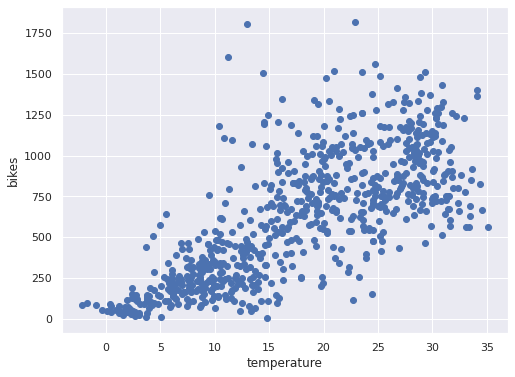

In [8]:
#@title **code**
bikes = pd.read_csv('data/bikes.csv')

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')

bikes.head()

To better understand regression problem, we will use only ne feature, as follows: 

In [9]:
#@title **code**
X_temp = bikes.values[:,[1]] 
y_count = bikes.values[:,-1] 
print(X_temp.shape, y_count.shape)

(729, 1) (729,)


In [10]:
#@title **code** We can use different max_depth boundaries

from sklearn.tree import DecisionTreeRegressor
import numpy as np

max_depth_1 =  2#@param {type:"number"}
max_depth_2 =  10#@param {type:"number"}

regressor = DecisionTreeRegressor(max_depth=max_depth_1)
regressorSA = DecisionTreeRegressor(max_depth=max_depth_2)
regressor.fit(X_temp, y_count)
regressorSA.fit(X_temp, y_count)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Now, we can ask to our model about the number of bikes, according to a temperature value. See the differences among both models.

In [12]:
Temp_1 =  1#@param {type:"number"}
Temp_2 =  22#@param {type:"number"}

print("with Temp 1")
print("R1: ", regressor.predict([[Temp_1]]) )
print("R2: ", regressorSA.predict([[Temp_1]]) )

print("with Temp 2")
print("R1: ", regressor.predict([[Temp_2]]) )
print("R2: ", regressorSA.predict([[Temp_2]]) )

with Temp 1
R1:  [189.23183761]
R2:  [45.77380952]
with Temp 2
R1:  [769.08756039]
R2:  [848.13888889]


Now, we can also visualize how both models **learn** to follow data.

Text(0, 0.5, 'bikes')

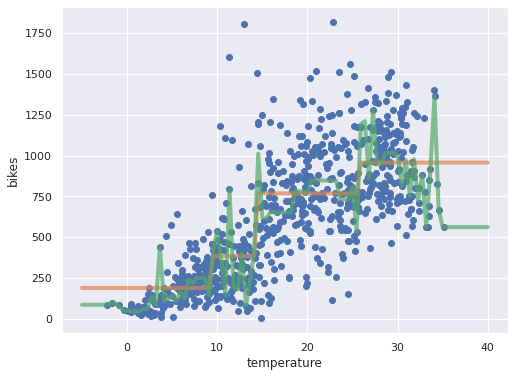

In [13]:
#@title **code** Boundaries visualization
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction2')
plt.plot(xx, regressorSA.predict(xx), linewidth=4, alpha=.7, label='prediction50')
plt.xlabel('temperature')
plt.ylabel('bikes')

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Which model is in general the best?
- How measure performance of the regression models?

- Can you use same performance metrics that classification?
- Why Yes/NOT?

Please see on complementary notes, the notebook: `com_Notas_05-4-Regression-Metrics.ipynb`

Now, we can measure and understand the performance of a particular approach. 



In [15]:
#@title **code**
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *


print ("MSE 2 depth %.3f"% mean_squared_error(bikes['count'], regressor.predict(np.array([bikes['temperature']]).T)))
print ("MSE 30 depth %.3f"% mean_squared_error(bikes['count'], regressorSA.predict(np.array([bikes['temperature']]).T)))


MSE 2 depth 62803.790
MSE 30 depth 31848.108


Of course, we also have cross-validation to measure more robustly the performance. 

In [43]:
#@title **code**
s = cross_val_score(regressor, np.array([bikes['temperature']]).T, bikes['count'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 2 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s = cross_val_score(regressorSA, np.array([bikes['temperature']]).T, bikes['count'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 30 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE depth: 2 68431.270 (+/- 13095.46384)
MSE depth: 30 96912.721 (+/- 20266.92920)


We can also implement our performance metrics. For instance: 

In [17]:
#@title **code**
print(y_count.shape)
print(X_temp.shape)

y_est = regressor.predict(X_temp)
y_est.shape
print("mse: ", np.square(np.subtract(y_count,y_est)).mean())
print("mse: ", mean_squared_error(y_count,y_est) )

(729,)
(729, 1)
mse:  62803.789784053784
mse:  62803.789784053755


Finally, we can visualize the resulting representation from trees. 

In [27]:
bikes.columns[[1]].values

array(['temperature'], dtype=object)

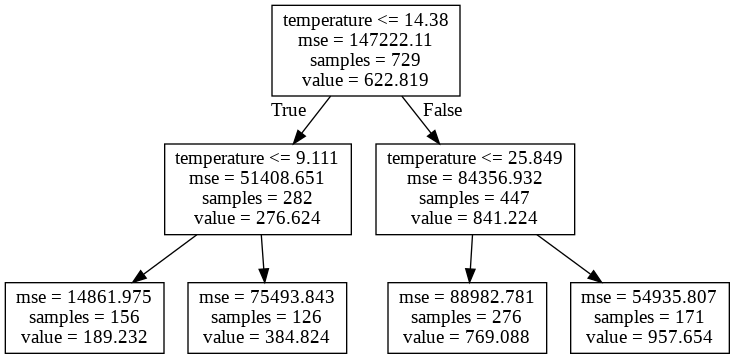

In [29]:
#@title **code** Visualize the resultant tree
#!sudo apt-get install graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(regressor, out_file='tree_r.dot', feature_names=bikes.columns[[1]].values)
!dot -Tpng tree_r.dot > tree_r.png

Image(filename='tree_r.png') 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now, run the model with all variables and ding a split (80-30). Report the perfomance, with: 

  - `mean_squared_log_error`
  - `mean_absolute_error`

 # **2. Plus Data and plus Regressors** <a name="eje2"></a>

see dataset description: http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

- airfoil self-noise: Ruido aerodinámico
- was processed by NASA
- Features: frequency, angle of attack, sound level (press) in decibels

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about next dataset?

(1503, 6)


freq  angle   chord   vel       suc     pres
0   800    0.0  0.3048  71.3  0.002663  126.201
1  1000    0.0  0.3048  71.3  0.002663  125.201
2  1250    0.0  0.3048  71.3  0.002663  125.951
3  1600    0.0  0.3048  71.3  0.002663  127.591
4  2000    0.0  0.3048  71.3  0.002663  127.461

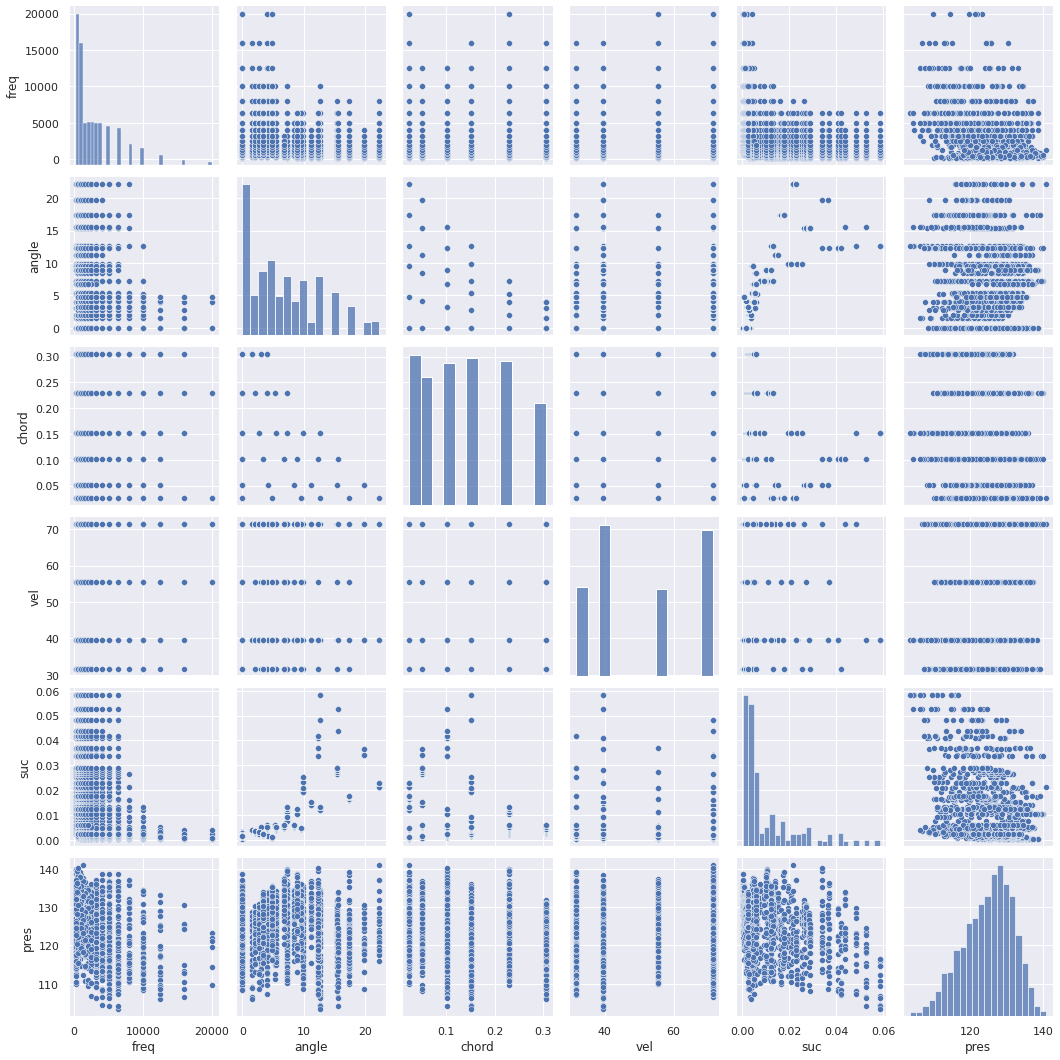

In [40]:
#@title **code**
d = pd.read_csv("data/airfoil_self_noise.dat.gz")
sns.pairplot(d); 
print (d.shape)
d.head()

same workflow, observe performance metric must be different for regression. is result acceptable??

In [41]:
#@title **code** depending of which variable we want to predict
X = d.values[:,:-1]
y = d.values[:,-1]

#X = d.values[:,[0,1,2,4,5]]
#y = d.values[:,-3]

In [44]:
#@title **code** with know DT
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
est = DecisionTreeRegressor(max_depth=20)
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print(s)
print ("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[4.8209803  5.26721511 8.41710094 5.5779635  7.71421711 5.35239873
 7.34643197 4.76949793 6.42913783 4.47602769]
MSE 6.017 (+/- 1.30905)


In [45]:
#@title **code** with know SVR
from sklearn.svm import SVR
est = SVR()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 39.403 (+/- 3.79543)


let's see SVR result more in detail. observe that whe training with less data performace drops. will use permutations to take a random half.

In [47]:
#@title **code** Taking random samples
n = int(len(d)*0.8)
est = DecisionTreeRegressor()
perm = np.random.permutation(len(d))

Xtr, ytr = X[perm[:n]], y[perm[:n]]
Xts, yts = X[perm[n:]], y[perm[n:]]

est.fit(Xtr, ytr)
print ("MSE %.3f"% mean_squared_error(yts, est.predict(Xts)))

MSE 7.568


Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

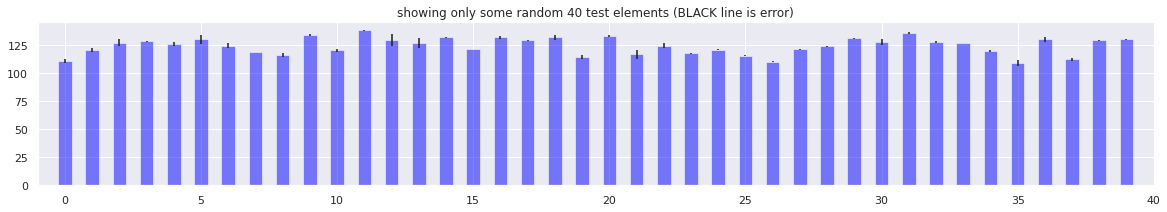

In [48]:
#@title **code** Observing performance of independent results

plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Report performance with DT, SVR, and RandomForestregressor ?
- Which is the best strategy in such problem?

# **3. Learning curves: Tunning parameters** <a name="eje3"></a>

One of the most critical points in ML is to fix best hyperparameters to deal with a proper **TRUE** performance. In such case a greedy scheme is demanding to find best data representation for a particular dataset and a particular strategy. 


For instance,  let's see the effect of increasing data using different K into the cross validation. 

In [50]:
#@title **code** learning curve
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()
   

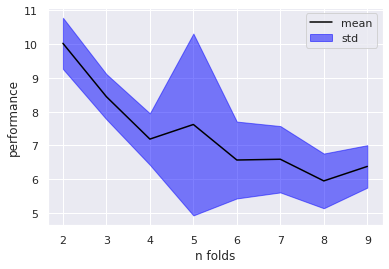

In [51]:
#@title **code** using DTR
show_curve(DecisionTreeRegressor()) 

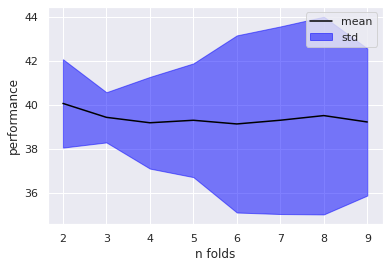

In [52]:
#@title **code** using SVR
show_curve(SVR())


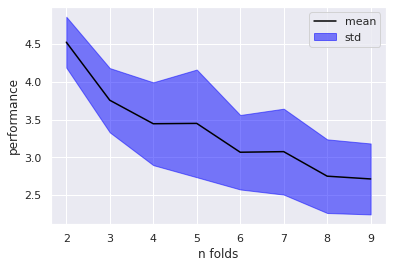

In [53]:
#@title **code** using RFR
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())

Now, we can use such curves to fix other hyperparameters of the strategies, for instance the number of trees in a random forest, the number of tree levels, among much others. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Explore a learning curve to find the best number of threes in a random forest approach.

- Use a learning curve to set the best max_depth of trees in both: random forest and decision trees. 





---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Try to explore the regression methodology in a new dataset. For instance explore **DIABETES** dataset.

- Which is the task to solve?
- Which are the features?
- How is the performance of the implemented methods?


age       sex       bmi        bp  ...        s4        s5        s6  target
0  0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019908 -0.017646   151.0
1 -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068330 -0.092204    75.0
2  0.085299  0.050680  0.044451 -0.005671  ... -0.002592  0.002864 -0.025930   141.0
3 -0.089063 -0.044642 -0.011595 -0.036656  ...  0.034309  0.022692 -0.009362   206.0
4  0.005383 -0.044642 -0.036385  0.021872  ... -0.002592 -0.031991 -0.046641   135.0
5 -0.092695 -0.044642 -0.040696 -0.019442  ... -0.076395 -0.041180 -0.096346    97.0
6 -0.045472  0.050680 -0.047163 -0.015999  ... -0.039493 -0.062913 -0.038357   138.0
7  0.063504  0.050680 -0.001895  0.066630  ...  0.017703 -0.035817  0.003064    63.0
8  0.041708  0.050680  0.061696 -0.040099  ... -0.002592 -0.014956  0.011349   110.0
9 -0.070900 -0.044642  0.039062 -0.033214  ... -0.002592  0.067736 -0.013504   310.0

[10 rows x 11 columns]

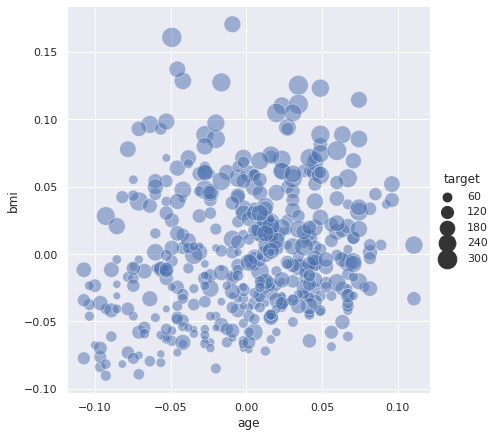

In [59]:
#@title **code**
import numpy as np
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()


variable_x = "age" #@param {type:"string"}
variable_y = "bmi" #@param {type:"string"}
variable_s = "target" #@param {type:"string"}


pandas_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
pandas_diabetes["target"] =  pd.Series(diabetes.target)


sns.relplot(x=variable_x, y=variable_y, size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pandas_diabetes)


pandas_diabetes.head(10)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = 
y =

print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

# References

[1] airfoil self-noise: https://www.neuraldesigner.com/learning/examples/airfoil_self_noise_prediction

[2] Metrics in regression: https://www.kaggle.com/learn-forum/52081



---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
